In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import os

import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
from PIL import Image

import sys
import torch.optim as optim

d:\python\odyn\anak2\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] Nie można odnaleźć określonej procedury'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
import xmltodict

In [3]:
img_names=[] 
xml_names=[] 
for dirname, _, filenames in os.walk('D:\\python\\meow\\pruby\\ds\\mask\\mask'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]!="xml":
            img_names.append(filename)
        else:
            xml_names.append(filename)

In [4]:
print(len(img_names),len(xml_names))

853 853


In [6]:
path_annotations="D:\\python\\meow\\pruby\\ds\\mask\\mask\\annotations\\"
listing=[]
for i in img_names[:]:
    with open(path_annotations+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])

In [7]:
Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items,'\n',values)

dict_keys(['without_mask', 'with_mask', 'mask_weared_incorrect']) 
 dict_values([717, 3232, 123])


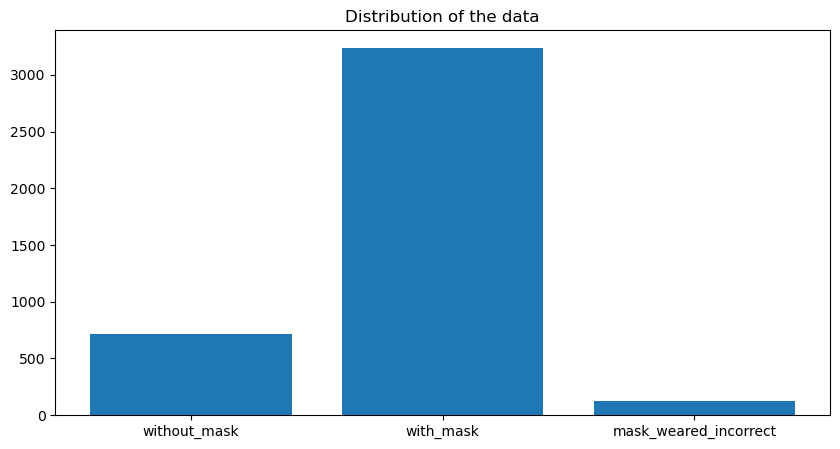

In [8]:
#visualize the distribution of the data
plt.figure(figsize=(10,5))
plt.bar(Items,values)
plt.title("Distribution of the data")
plt.show()


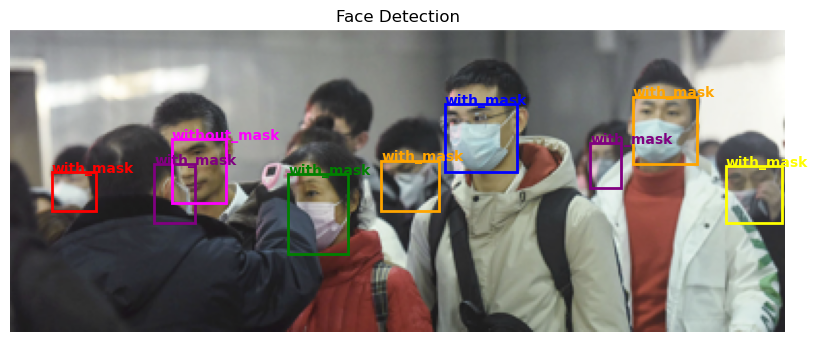

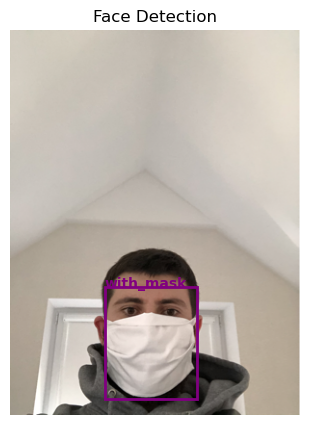

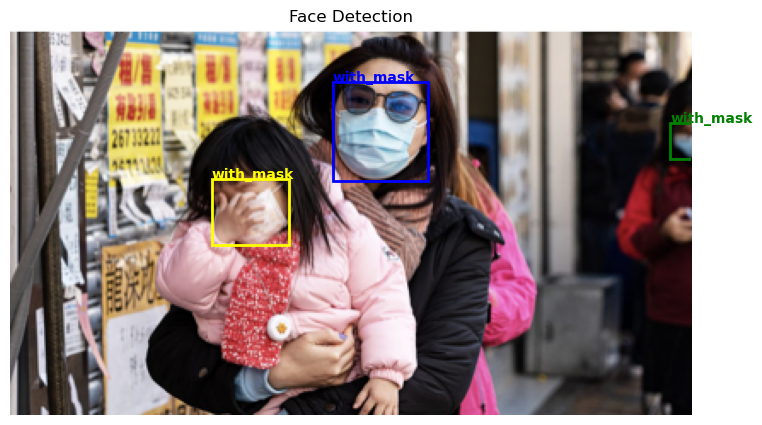

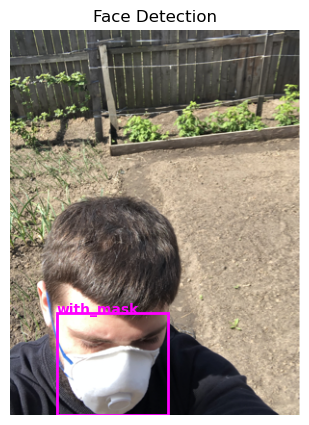

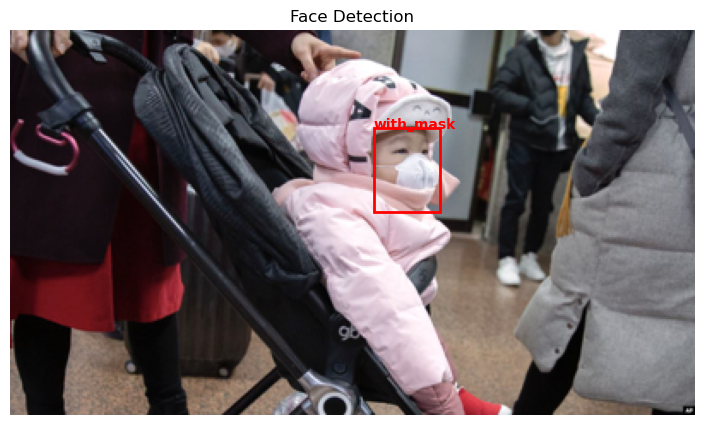

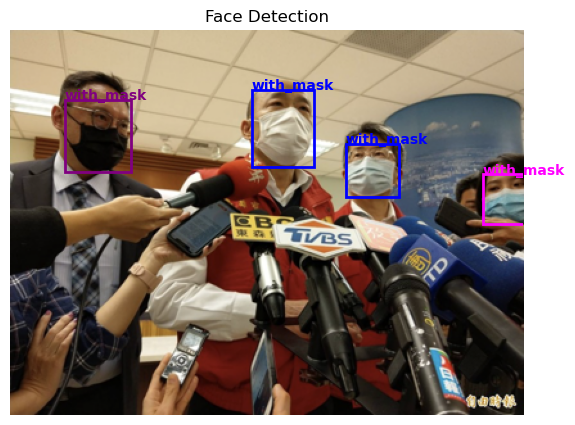

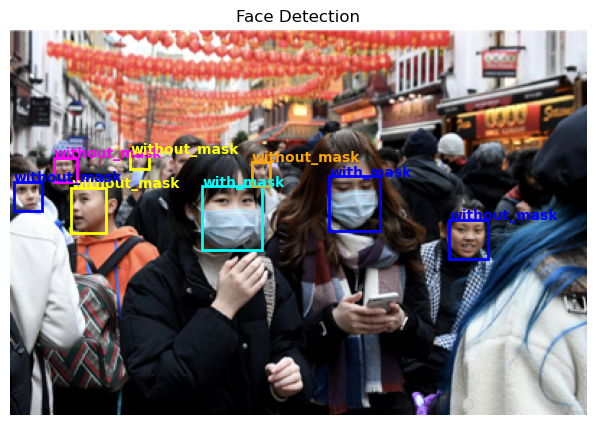

In [12]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def face_det(img):
    # Get the path to the XML annotation file
    xml_path = path_annotations + img[:-4] + ".xml"
    with open(xml_path) as xml_file:
        xml_data = xml_file.read()

    # Parse the XML data
    root = ET.fromstring(xml_data)
    image_path = os.path.join(path_image, img)
    image = plt.imread(image_path)

    # Create a plot
    fig, ax = plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10, 5)

    # Find all object elements in the XML data
    objects = root.findall("object")
    if len(objects) > 0:
        for obj in objects:
            # Extract object name and bounding box coordinates
            name = obj.find("name").text
            bbox = obj.find("bndbox")

            x = int(bbox.find("xmin").text)
            y = int(bbox.find("ymin").text)
            w = int(bbox.find("xmax").text) - x
            h = int(bbox.find("ymax").text) - y

            # Generate a random color for the bounding box
            color = get_random_color()

            # Create a rectangle patch for the bounding box
            mpatch = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor=color, facecolor="none", lw=2)
            ax.add_patch(mpatch)

            # Add label annotation to the bounding box
            rx, ry = mpatch.get_xy()
            ax.annotate(name, (rx, ry), color=color, weight='bold', fontsize=10, ha='left', va='baseline')

    # Display the image with bounding boxes
    ax.imshow(image)
    ax.set_title("Face Detection")
    plt.show()

def get_random_color():
    colors = ["red", "green", "blue", "orange", "purple", "cyan", "magenta", "yellow"]
    return random.choice(colors)

test_img = img_names.copy()
for i in range(1, 8):
    # Perform face detection on each test image
    face_det(test_img[i])

In [13]:
options={"with_mask":0,"without_mask":1,"mask_weared_incorrect":2} 

from PIL import Image
import xml.etree.ElementTree as ET
import torch
from torchvision import transforms

def dataset_creation(image_list):
    final_dataset = []

    for image_name in image_list:
        # Read XML annotation file
        xml_path = path_annotations + image_name[:-4] + ".xml"
        with open(xml_path) as xml_file:
            xml_data = xml_file.read()

        # Parse XML data
        root = ET.fromstring(xml_data)
        objects = root.findall("object")

        for obj in objects:
            # Extract object name and bounding box coordinates
            name = obj.find("name").text
            bbox = obj.find("bndbox")

            x = int(bbox.find("xmin").text)
            y = int(bbox.find("ymin").text)
            w = int(bbox.find("xmax").text) - x
            h = int(bbox.find("ymax").text) - y

            # Get label for the object
            label = options[name]

            # Crop and transform the image
            image_path = os.path.join(path_image, image_name)
            image = transforms.functional.crop(Image.open(image_path).convert("RGB"), y, x, h, w)
            image_tensor = my_transform(image)

            # Add image and label pair to the final dataset
            final_dataset.append([image_tensor, torch.tensor(label)])

    return tuple(final_dataset)


# Define the transformation pipeline for image processing
my_transform = transforms.Compose([
    transforms.Resize((226, 226)),
    transforms.ToTensor()
])

# Create the dataset using the modified function
mydataset = dataset_creation(img_names)

In [14]:
mydataset[0]

[tensor([[[0.4941, 0.4941, 0.4941,  ..., 0.6157, 0.6157, 0.6157],
          [0.4941, 0.4941, 0.4941,  ..., 0.6157, 0.6157, 0.6157],
          [0.4941, 0.4941, 0.4941,  ..., 0.6157, 0.6157, 0.6157],
          ...,
          [0.1843, 0.1843, 0.1843,  ..., 0.3216, 0.3216, 0.3216],
          [0.1843, 0.1843, 0.1843,  ..., 0.3216, 0.3216, 0.3216],
          [0.1843, 0.1843, 0.1843,  ..., 0.3216, 0.3216, 0.3216]],
 
         [[0.4431, 0.4431, 0.4431,  ..., 0.5216, 0.5216, 0.5216],
          [0.4431, 0.4431, 0.4431,  ..., 0.5216, 0.5216, 0.5216],
          [0.4431, 0.4431, 0.4431,  ..., 0.5216, 0.5216, 0.5216],
          ...,
          [0.1216, 0.1216, 0.1216,  ..., 0.1647, 0.1647, 0.1647],
          [0.1216, 0.1216, 0.1216,  ..., 0.1647, 0.1647, 0.1647],
          [0.1216, 0.1216, 0.1216,  ..., 0.1647, 0.1647, 0.1647]],
 
         [[0.4784, 0.4784, 0.4784,  ..., 0.5216, 0.5216, 0.5216],
          [0.4784, 0.4784, 0.4784,  ..., 0.5216, 0.5216, 0.5216],
          [0.4784, 0.4784, 0.4784,  ...,

In [15]:
# Split the dataset into training and validation sets
train_size = int(0.8 * len(mydataset))
val_size = len(mydataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(mydataset, [train_size, val_size])
# Create a data loader from the dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)
# Create a pretrained model
model = models.resnet18(pretrained=True)
# Freeze model parameters
for param in model.parameters():
    param.requires_grad = False
# Change the final layer of the model to output 3 classes
import torch.nn as nn
model.fc = nn.Linear(512, 3)
# Define the device for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Move the model to the device specified
model.to(device)
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)
# Train the model for 10 epochs
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0
    val_loss = 0
    # Training loop
    for images, labels in train_loader:
        # Move tensors to the specified device
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation loop
    model.eval()
    for images, labels in val_loader:
        # Move tensors to the specified device
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

    model.train()
    # Print training and validation losses
    print(f"Epoch {epoch+1} : Train loss: {train_loss/len(train_loader)} Val loss: {val_loss/len(val_loader)}")

# Save the trained model
torch.save(model.state_dict(), "face_mask_detection.pth")



d:\python\odyn\anak2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\python\odyn\anak2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 : Train loss: 0.5436564052806181 Val loss: 0.39729537069797516
Epoch 2 : Train loss: 0.35809362007706774 Val loss: 0.3087107206766422
Epoch 3 : Train loss: 0.31414082251927433 Val loss: 0.31325358840135425
Epoch 4 : Train loss: 0.2905573321177679 Val loss: 0.25969298585103107
Epoch 5 : Train loss: 0.2684043472742333 Val loss: 0.25411038358624166
Epoch 6 : Train loss: 0.24433641738313086 Val loss: 0.24289234555684602
Epoch 7 : Train loss: 0.24433806947633332 Val loss: 0.23959361675840157
Epoch 8 : Train loss: 0.2292245225433041 Val loss: 0.22659184210575545
Epoch 9 : Train loss: 0.23090571683703684 Val loss: 0.22539036649350935
Epoch 10 : Train loss: 0.22852824321564505 Val loss: 0.2336229532957077
